In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1.
Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

**Importamos el dataset**

In [2]:
wine = pd.read_csv('csv/WineQT.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


**Enseñamos las 5 primeras filas y las 5 últimas**

In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


**Borramos la columna Id y separamos los datos de entrada y etiquetas (resultados)**

In [5]:
wine = wine.drop('Id', axis=1)
x_wine = wine.drop('quality', axis=1)
y_wine = wine['quality']

**Mostramos los parámetros estadísticos del dataset**

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Creamos el mapa de calor del dataset**

<Axes: >

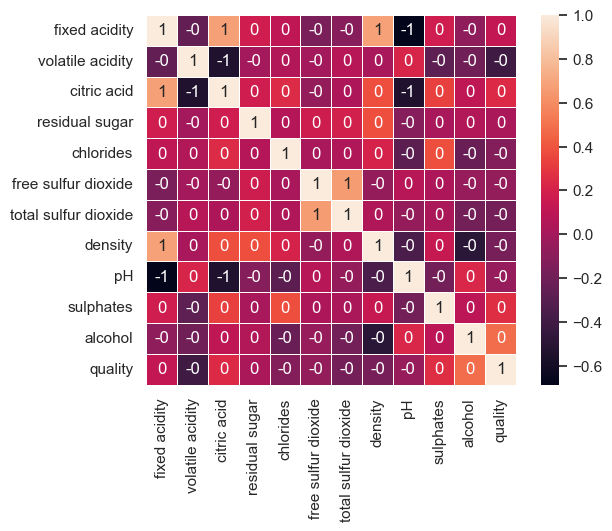

In [7]:
sns.set()
sns.heatmap(wine.corr(), square = True, annot=True, fmt=".0f", linewidth=.5)

**Separamos los datos entre entrenamiento y prueba, como se pide un 25% para el test, se usa el parámetro test_size**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, random_state=1, test_size=0.25)

**Elegimos, instanciamos y entrenamos el modelo**

In [9]:
model = GaussianNB()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

**La precisión de este modelo es de un 59.8%**

In [10]:
accuracy_score(y_test, y_predict) * 100

59.79020979020979

**Obtenemos un array con las predicciones hechas por nuestro modelo**

In [11]:
y_predict

array([6, 5, 7, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 7, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 4, 5, 6, 5, 7, 6, 7, 6,
       6, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 4, 6, 6, 5, 7, 7, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6,
       6, 6, 5, 6, 7, 6, 6, 5, 6, 7, 6, 5, 7, 5, 5, 6, 6, 7, 6, 5, 5, 6,
       6, 5, 6, 5, 7, 7, 5, 5, 6, 4, 5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 7, 7, 5, 5, 5, 5, 6, 6, 7, 5, 6, 7, 6, 6, 6, 6, 7, 5, 5, 4,
       6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 7, 5, 7, 5, 7, 6, 7,
       6, 6, 6, 6, 7, 7, 5, 7, 5, 6, 7, 6, 5, 7, 4, 5, 6, 5, 6, 6, 6, 6,
       3, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 7, 7, 6, 3, 6, 7,
       7, 6, 6, 6, 7, 7, 7, 4, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 5, 5,
       5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5,
       5, 6, 5, 6, 5, 4, 4, 6, 7, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 4, 6])

**Generamos una matriz de confusión a partir de la predicción de nuestro modelo**

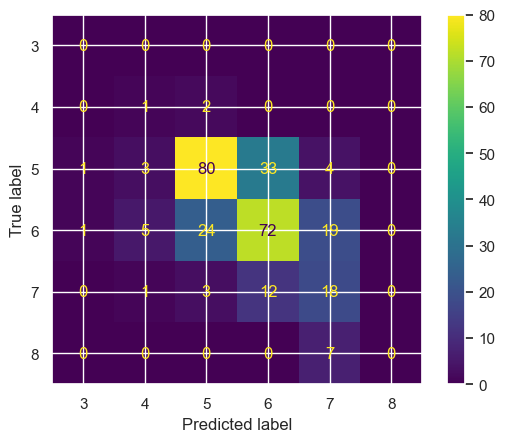

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# 2.

Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.


**Importamos el dataset**

In [13]:
disease = pd.read_csv('heart.csv')
disease

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

**Mostramos las 5 primeras y últimas filas**

In [ ]:
disease.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
disease.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


**Mostramos los parámetros estadísticos del dataset**

In [ ]:
disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Sustituimos los valores en formato texto por booleanos**

In [ ]:
# disease['Sex'] = disease['Sex'].replace(['M'], 0)
# disease['Sex'] = disease['Sex'].replace(['F'], 1)

# disease['ST_Slope'] = disease['ST_Slope'].replace(['Up'], 0)
# disease['ST_Slope'] = disease['ST_Slope'].replace(['Flat'], 1)

# disease['ExerciseAngina'] = disease['ExerciseAngina'].replace(['N'], 0)
# disease['ExerciseAngina'] = disease['ExerciseAngina'].replace(['Y'], 1)





disease = disease.apply(lambda col: pd.factorize(col, sort=True)[0])


disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [ ]:
x_disease = disease.drop('HeartDisease', axis=1)
y_disease = disease['HeartDisease']

**Creamos el mapa de calor del dataframe**

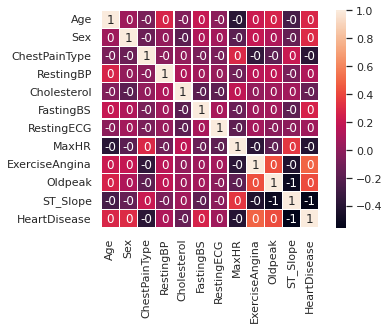

In [ ]:
sns.set()
sns.heatmap(disease.corr(), square = True, annot=True, fmt=".0f", linewidth=.5)

**Separamos los datos entre entrenamiento y prueba, como se pide un 25% para el test, se usa el parámetro test_size**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_disease, y_disease, random_state=1, test_size=0.25)

**Elegimos, instanciamos y entrenamos el modelo**

In [ ]:
model = GaussianNB()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

**Nuestro modelo tiene una precisión del 87.39%**

In [ ]:
accuracy_score(y_test, y_predict) * 100

87.39130434782608

**Obtenemos un array con las predicciones hechas por nuestro modelo**

In [ ]:
y_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

**Generamos una matriz de confusión a partir de la predicción de nuestro modelo**

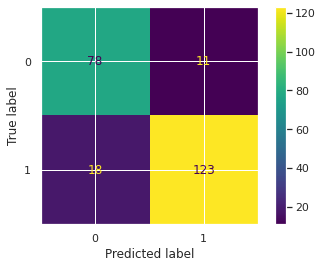

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)